In [1]:
import numpy as np

In [2]:
# pooling layer: 

def colors(c):
    if c <= -1:
        return -1
    if c >= 1:
        return 1
    return 0

vcolors = np.vectorize(colors)

In [3]:
def image_convolution(matrix, kernel):
    # kernel can be asymmetric but still needs to be odd
    k_height, k_width = kernel.shape
    m_height, m_width = matrix.shape
    m_height -= 2
    m_width -= 2
    padded = matrix

    # iterates through matrix, applies kernel, and sums
    output = []
    for i in range(m_height):
        for j in range(m_width):
            between = padded[i:k_height+i, j:k_width+j]*kernel
            output.append(np.sum(between))

    output=np.array(output).reshape((m_height, m_width))
    output = vcolors(output)
    return output

In [41]:
# 1 == white, 0 == gray, -1 == black

matrix = np.array([
                    [ 1, 1, 1,-1,-1,-1, 1, 1, 1],
                    [ 1, 1,-1,-1, 0,-1,-1, 1, 1],
                    [ 1,-1,-1, 0, 0, 0,-1,-1, 1],
                    [-1,-1, 0, 0, 0, 0, 0,-1,-1],
                    [-1,-1, 0, 0, 0, 0, 0,-1,-1],
                    [ 1,-1,-1, 0, 0, 0,-1,-1, 1],
                    [ 1, 1,-1,-1, 0,-1,-1, 1, 1],
                    [ 1, 1, 1,-1,-1,-1, 1, 1, 1]
                  ])

In [42]:
# identity
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

# smoothing
kernel = np.array([[  0, 0.2,   0],
                   [0.2,   1, 0.2],
                   [  0, 0.2,   0]])

# edge detection
kernel = np.array([[ 0, -1,  0],
                   [-1,  4, -1],
                   [ 0, -1,  0]])

In [43]:
result = image_convolution(matrix, kernel)
result

array([[ 1, -1, -1,  1, -1, -1,  1],
       [-1, -1,  1,  0,  1, -1, -1],
       [-1,  1,  0,  0,  0,  1, -1],
       [-1,  1,  0,  0,  0,  1, -1],
       [-1, -1,  1,  0,  1, -1, -1],
       [ 1, -1, -1,  1, -1, -1,  1]])

In [44]:
from matplotlib import pyplot as plt

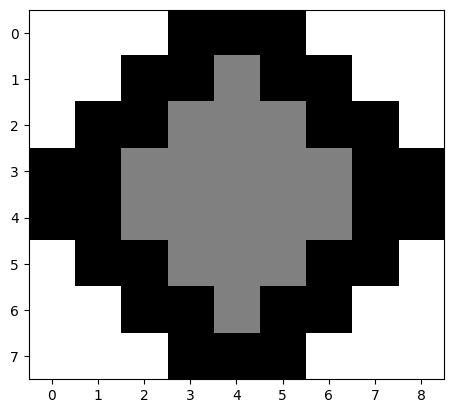

In [45]:
plt.imshow(matrix, cmap='gray', vmin=-1, vmax=1)

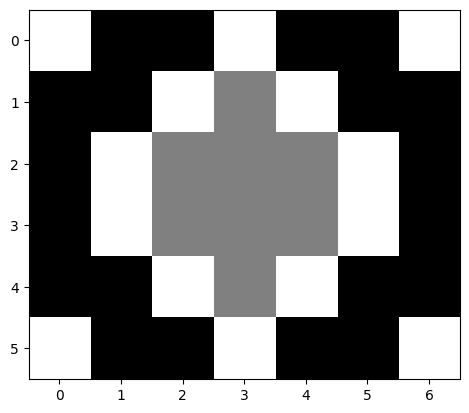

In [46]:
plt.imshow(result, cmap='gray', vmin=-1, vmax=1)

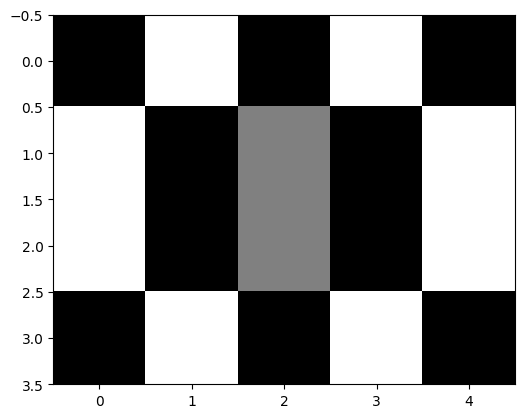

In [47]:
result2 = image_convolution(result, kernel)
result2
plt.imshow(result2, cmap='gray', vmin=-1, vmax=1)